In [1]:
!pip install pandas numpy matplotlib seaborn wordcloud


     -------------------------------------- 299.8/299.8 kB 2.3 MB/s eta 0:00:00


In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Set visualization style
sns.set(style="whitegrid")
%matplotlib inline

# Load the dataset
file_path = "Consumer Decision-making in the Digital Age_ Analyzing the Role of Online Reviews and Ratings (Responses).xlsx"
data = pd.read_excel(file_path)

# Display the first few rows of the dataset
data.head()


,Unnamed: 0,Unnamed: 1,01) Your Name,03) Age (in years)\n,04) Gender\n,05) Education Level,06) Occupation Status,07) Family Income(per month),08) Marital Status,09) Which Social Media platform you use? (Select all that apply),...,21) What factors contribute to your trust in online reviews and ratings? (Rate on a scale of 1-Not Important to 5-Very Important) [High Number of Reviews],21) What factors contribute to your trust in online reviews and ratings? (Rate on a scale of 1-Not Important to 5-Very Important) [Length and detail of the reviews],21) What factors contribute to your trust in online reviews and ratings? (Rate on a scale of 1-Not Important to 5-Very Important) [Whether the reviews are positive or negative],21) What factors contribute to your trust in online reviews and ratings? (Rate on a scale of 1-Not Important to 5-Very Important) [Whether the reviews are recent],"21) What factors contribute to your trust in online reviews and ratings? (Rate on a scale of 1-Not Important to 5-Very Important) [Reviewer demographics (age, location, etc.)]","22) Overall, how effective do you find online reviews in shaping your purchase decision?","23) Overall, how effective do you find online ratings in shaping your purchase decision?",24) Will online reviews and ratings continue to be an important factor in your future purchasing decisions?,25) What improvements would you like to see in the online reviews and rating system to aid your decision-making?,In which of the following city do you reside?
0,NaN,NaN,Soumana Hassane,18-25,Male,UG,Student,10k-25k,Unmarried,"Instargram, Facebook, Twitter, Linkedin, Youtu...",...,4,4,4,4,4,5,4,It depends on product or service,Better filtering options,NaN
1,NaN,NaN,Bibek Bhandari,18-25,Male,UG,Student,10k-25k,Unmarried,"Instargram, Facebook, Twitter, Linkedin, Youtu...",...,3,3,3,3,3,4,4,Yes,More reliable verification methods,NaN
2,NaN,NaN,Ashvanth,18-25,Male,UG,Student,25k-50k,Unmarried,"Linkedin, Youtube, WhatsApp",...,5,3,4,4,4,5,3,Yes,More reliable verification methods,NaN
3,NaN,NaN,Parvendan,18-25,Male,UG,Student,75k-100k,Unmarried,"Instagram, Linkedin",...,5,5,3,4,4,5,3,Yes,Better filtering options,NaN
4,NaN,NaN,Tanira Edirisinghe,18-25,Male,UG,Student,75k-100k,Unmarried,"Instagram, Youtube, WhatsApp",...,3,3,3,3,4,4,4,Yes,Better filtering options,NaN


In [4]:
# Basic information about the dataset
data.info()

# Summary statistics for numerical columns
data.describe()

# Check for missing values
missing_values = data.isnull().sum()
missing_values[missing_values > 0]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 41 columns):
 #   Column                                                                                                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                                                                                                --------------  -----  
 0   Unnamed: 0                                                                                                                                                                            0 non-null      float64
 1   Unnamed: 1                                                                                                                                                                            0 non-null      float64
 2   01) Your Name                                 

Unnamed: 0                                       160
Unnamed: 1                                       160
In which of the following city do you reside?    142
dtype: int64

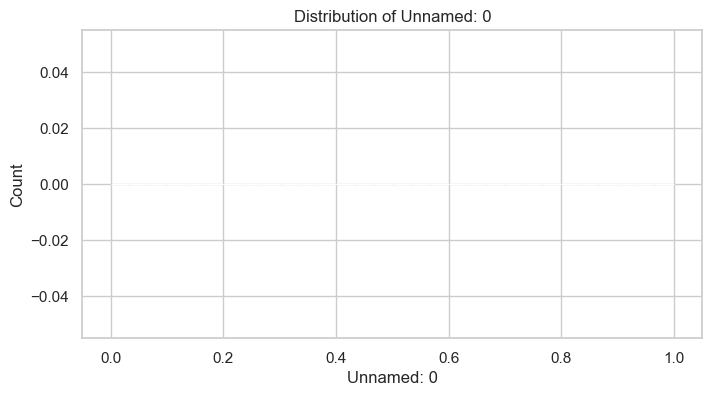

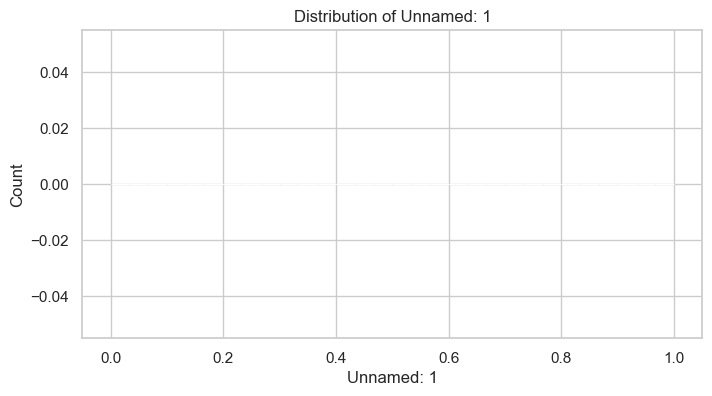

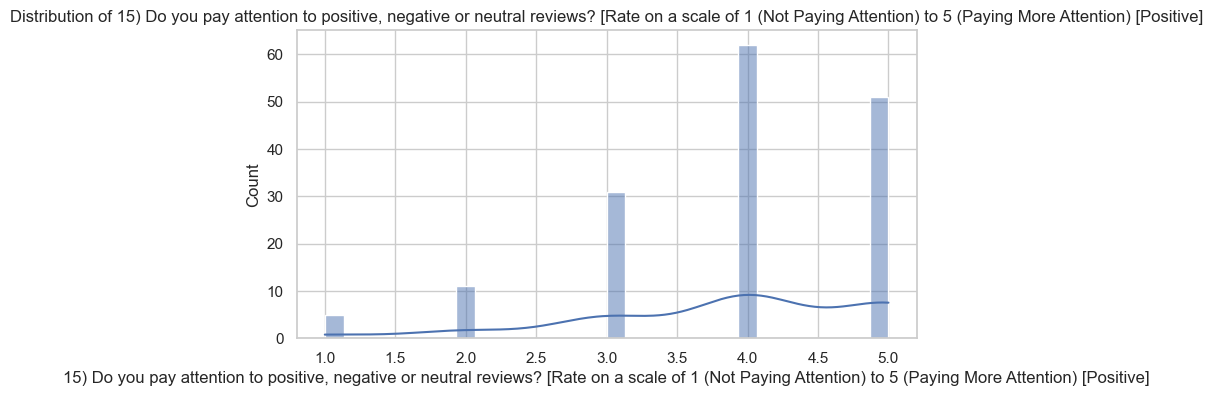

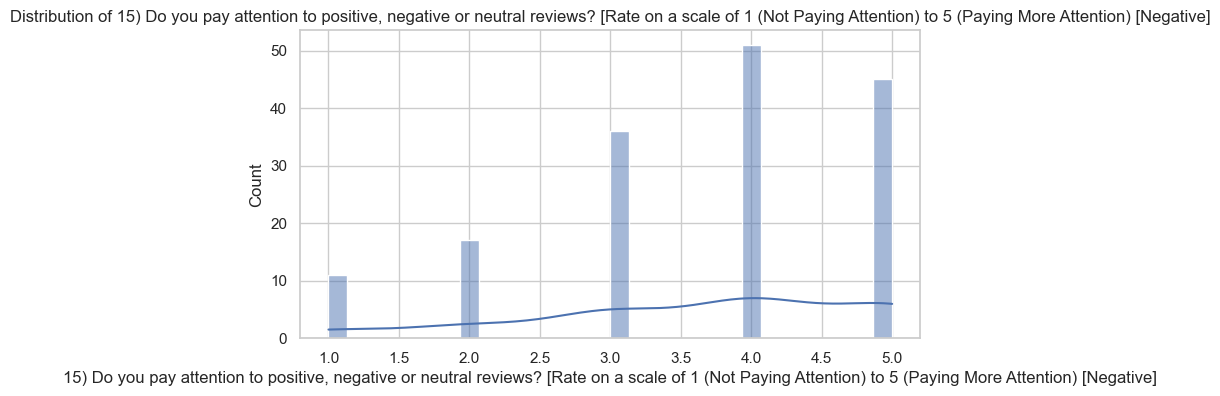

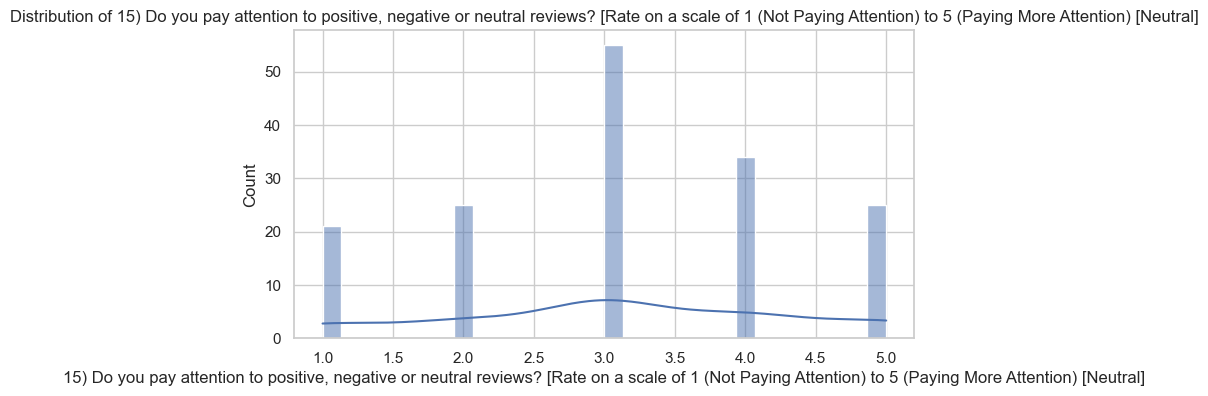

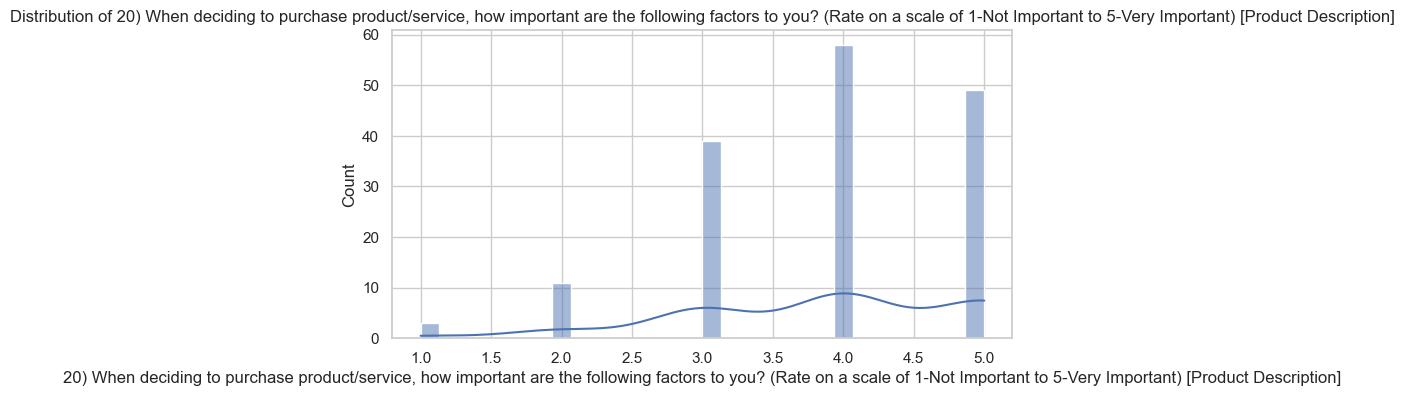

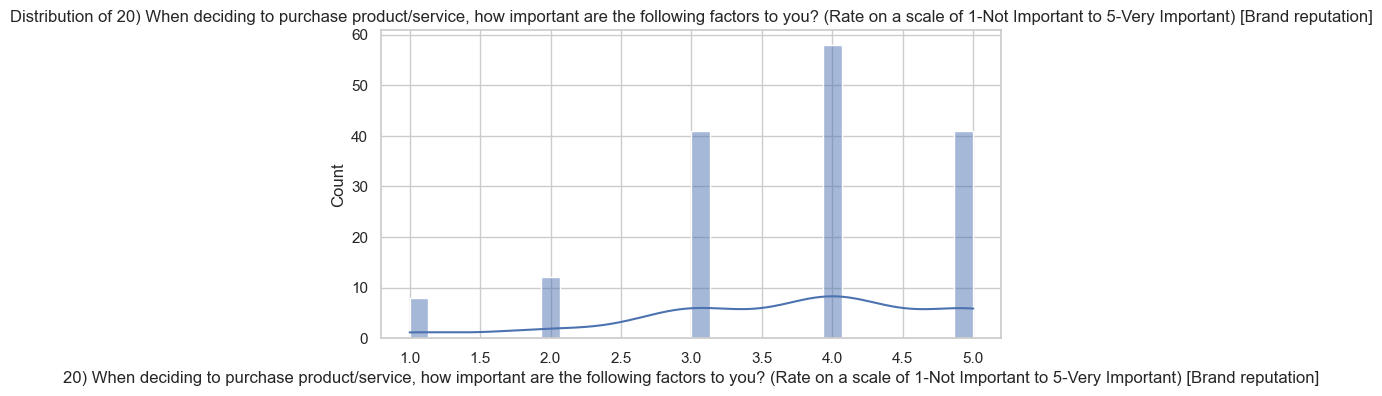

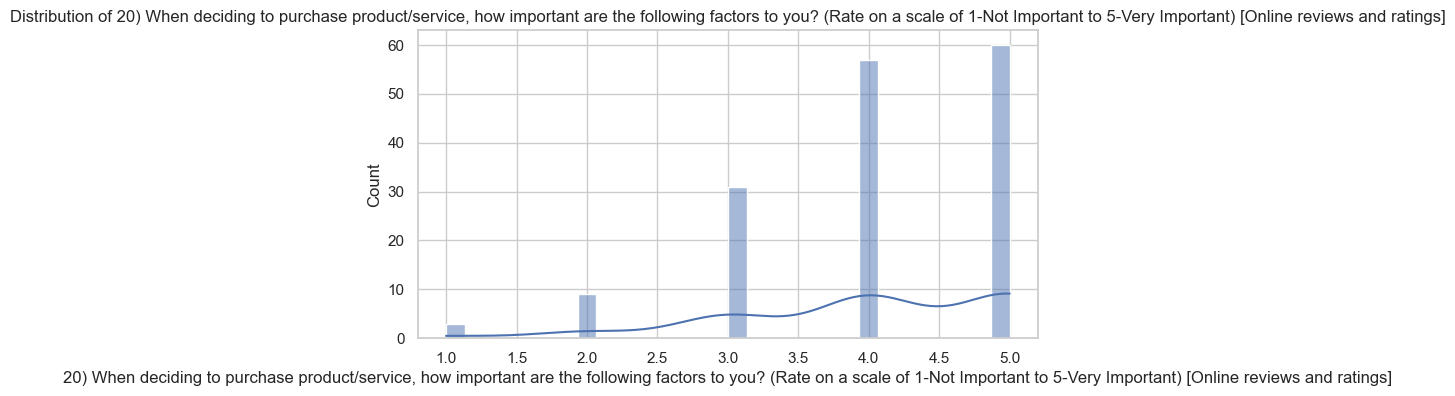

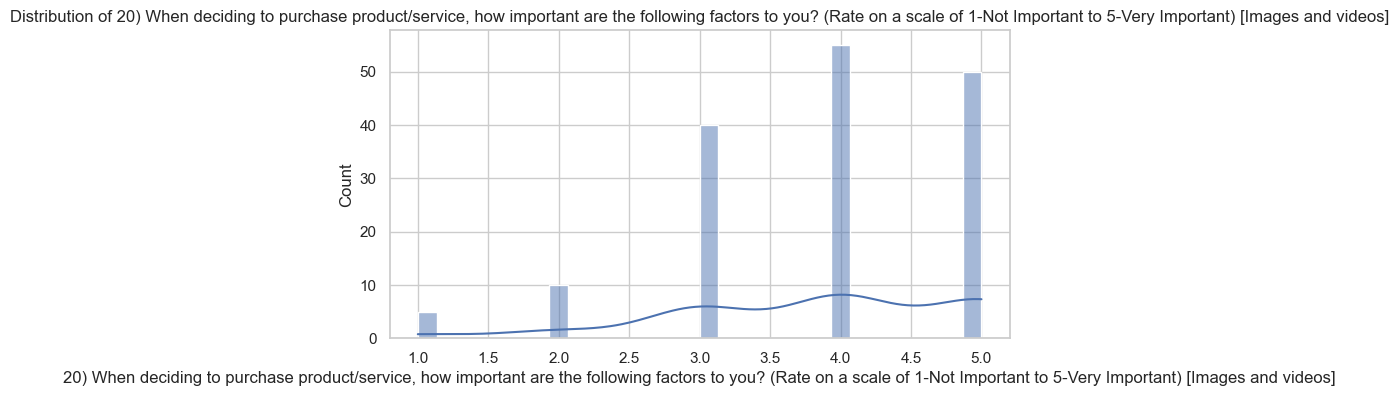

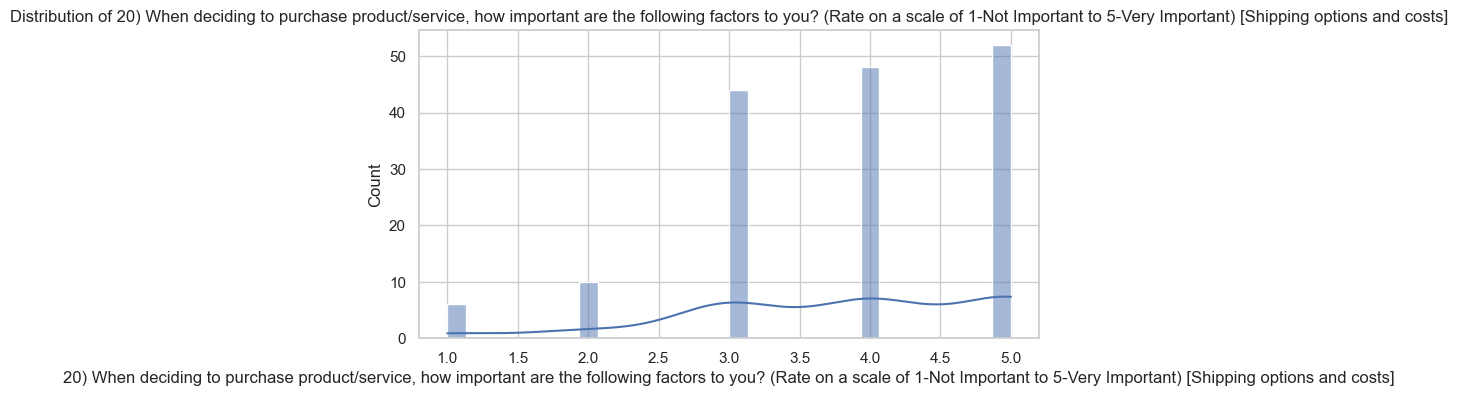

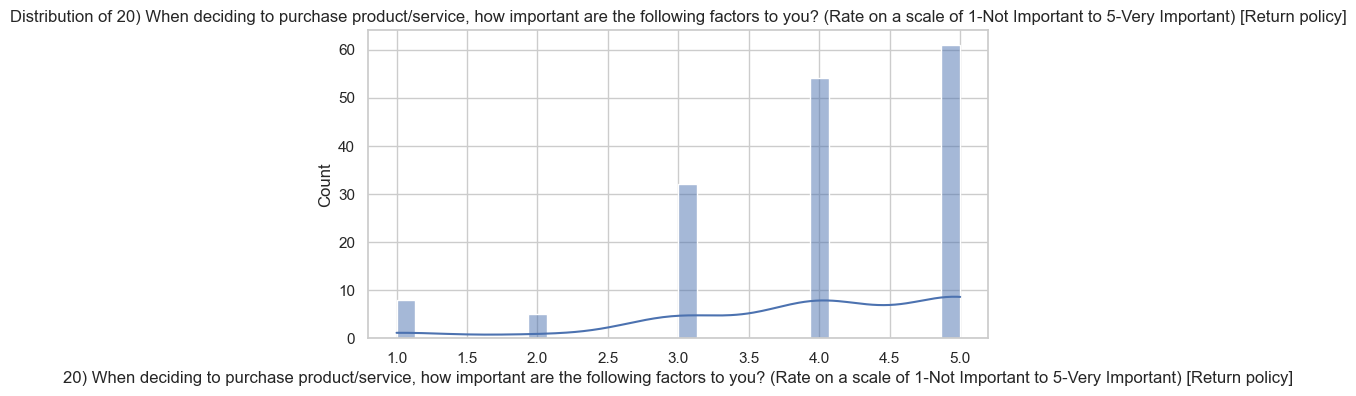

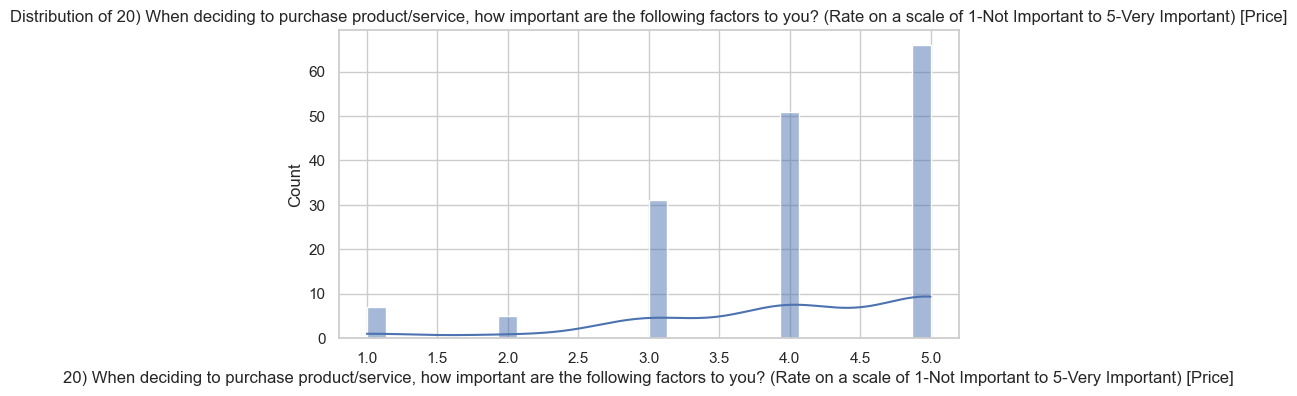

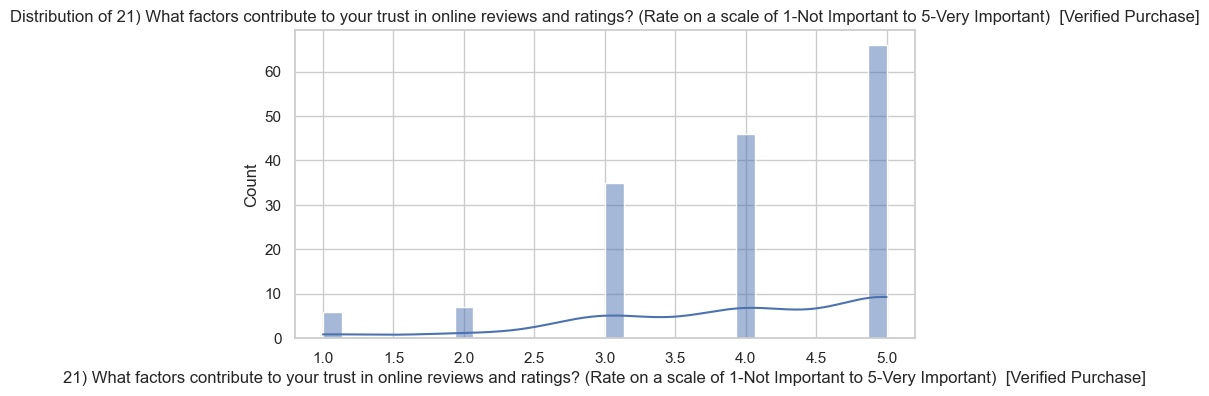

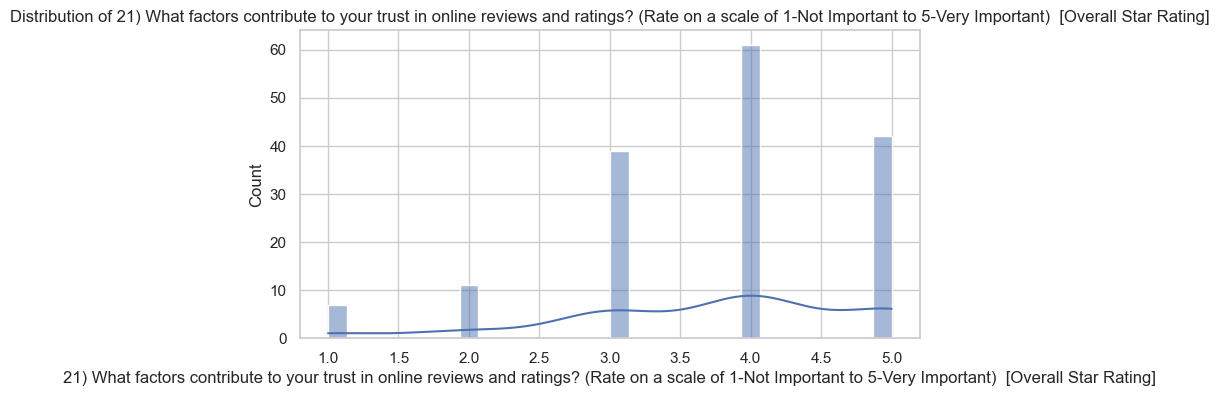

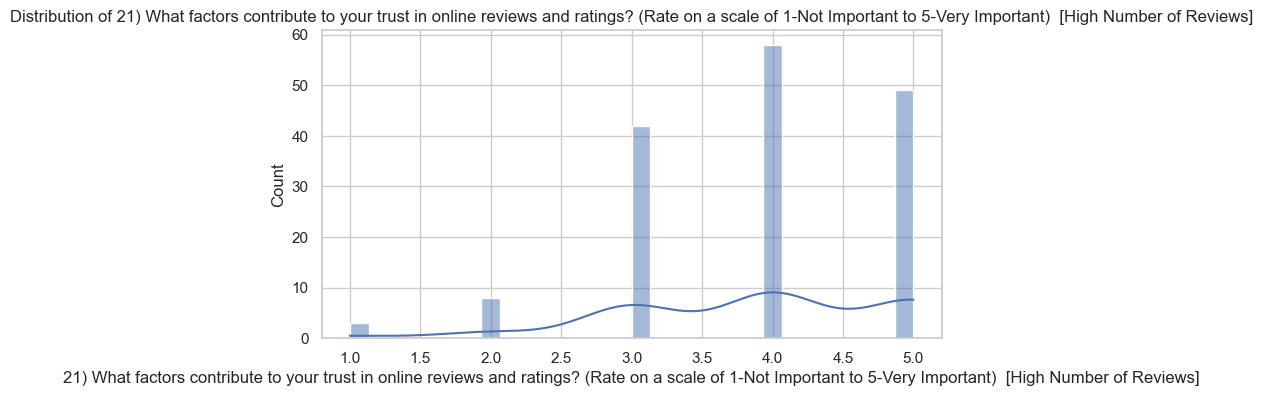

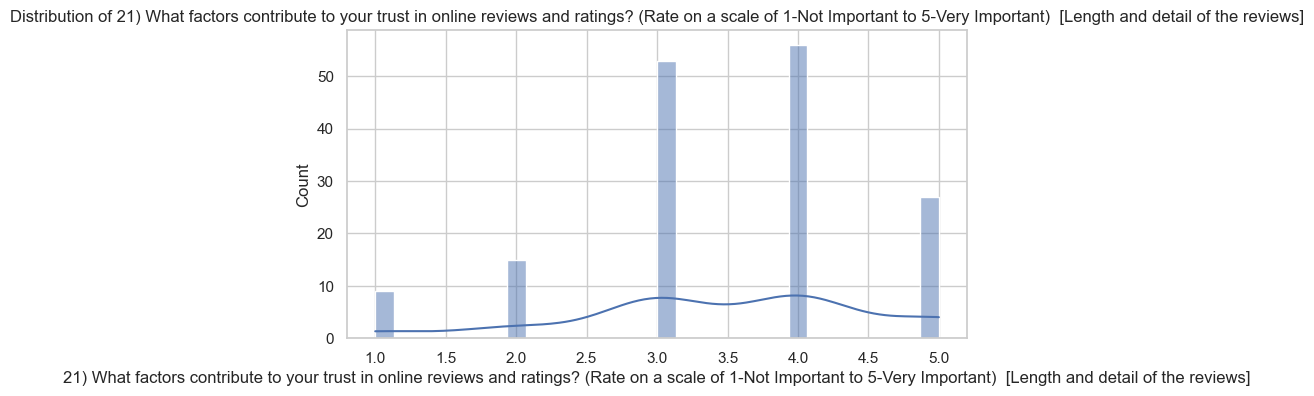

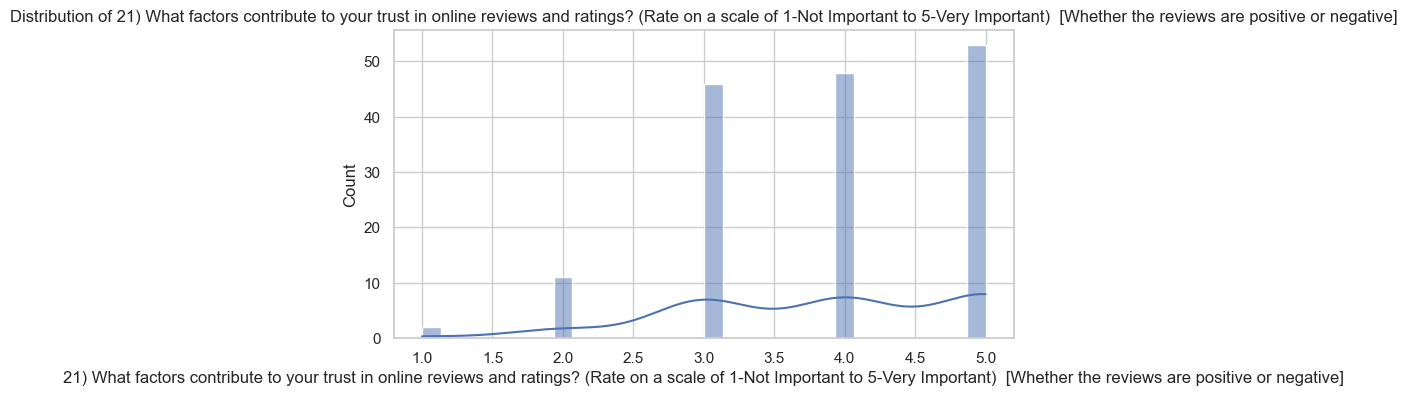

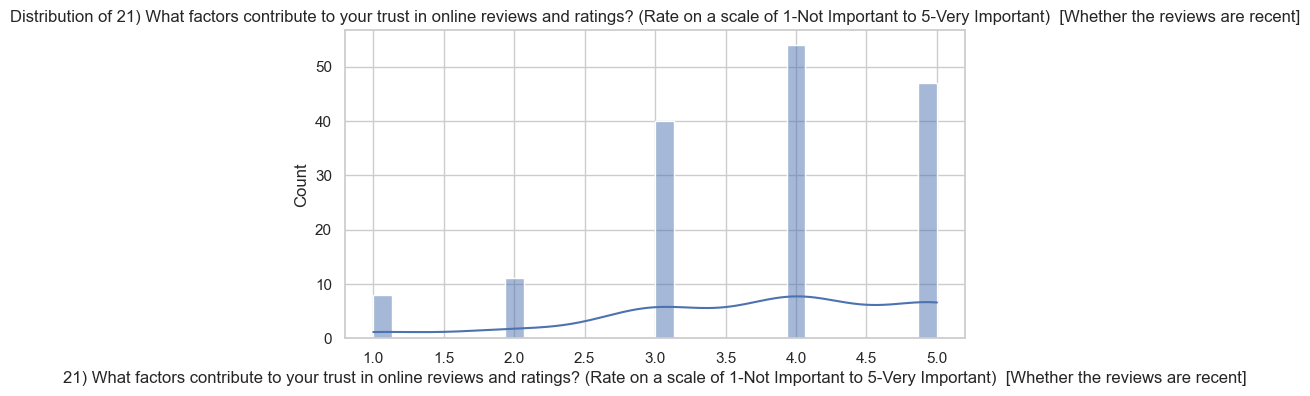

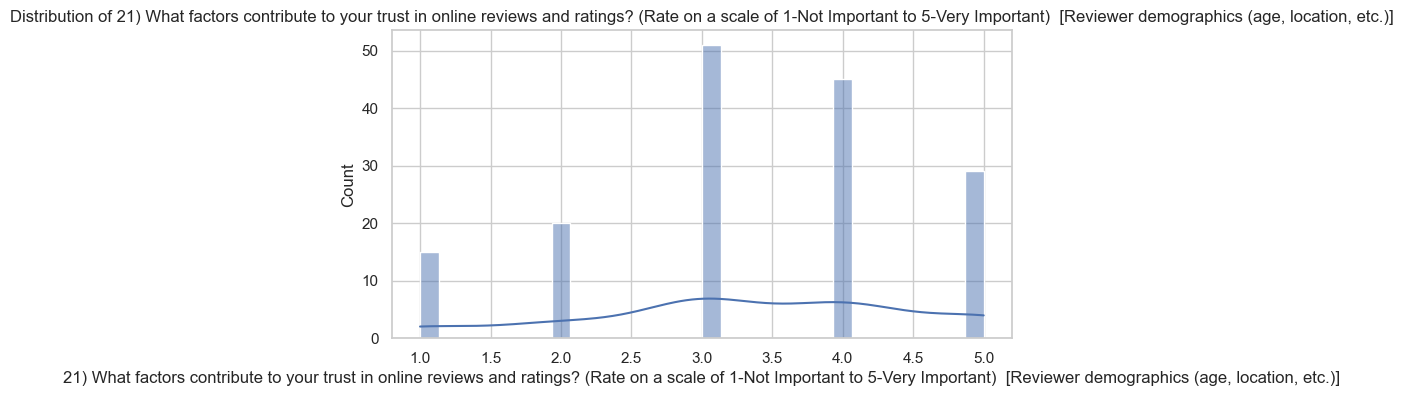

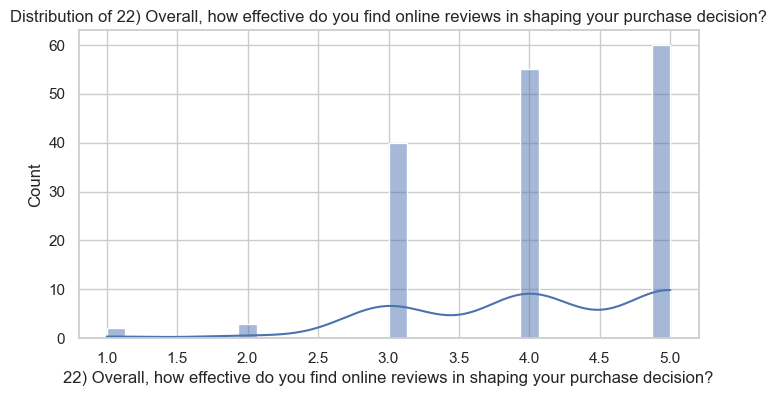

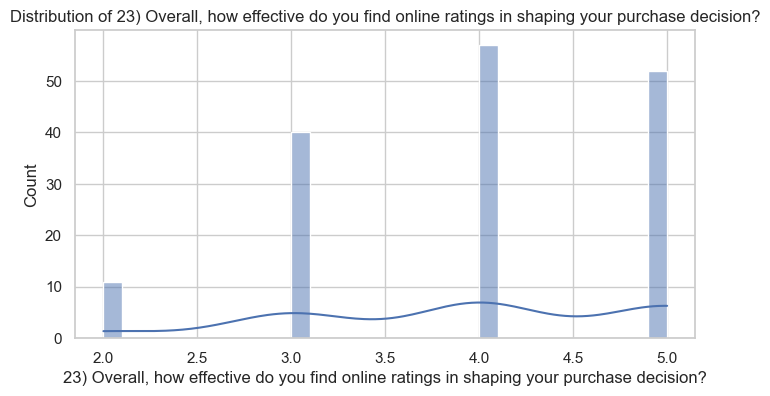

In [5]:
# Histogram for numerical columns
numeric_cols = data.select_dtypes(include=np.number).columns
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.show()


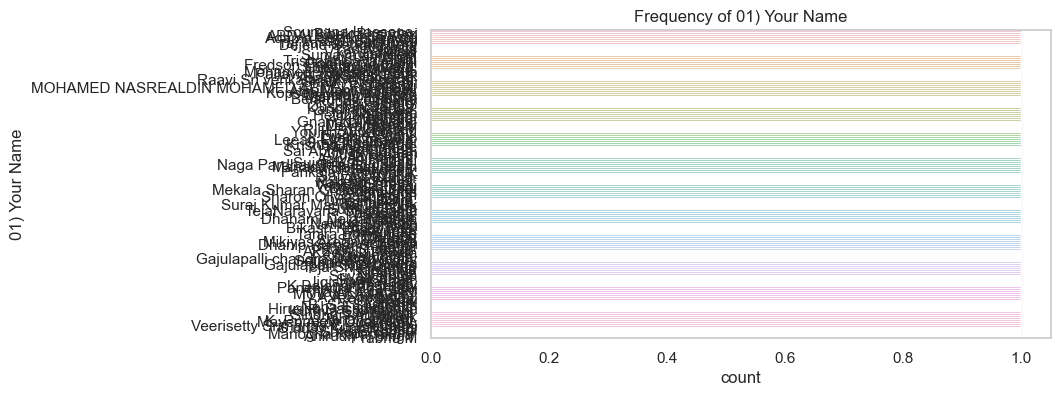

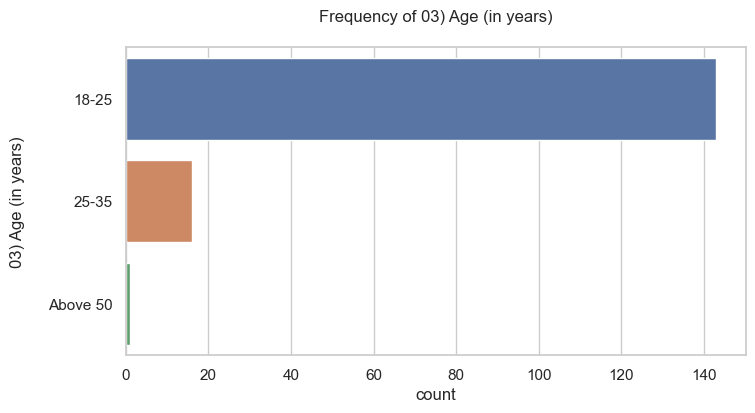

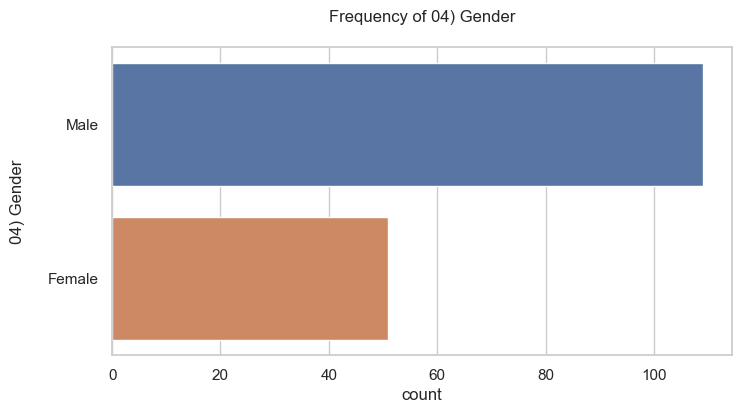

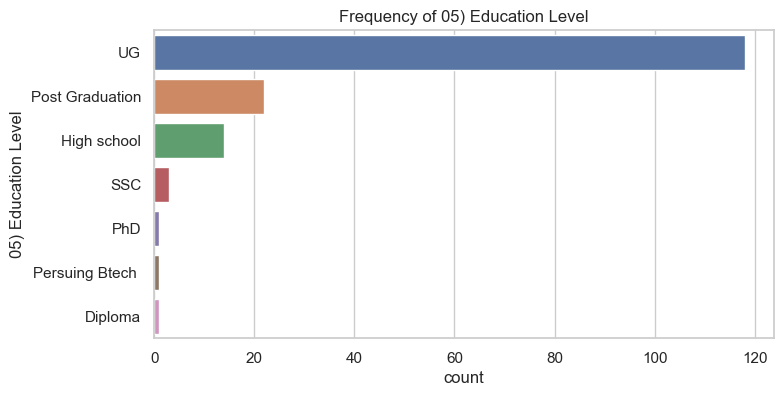

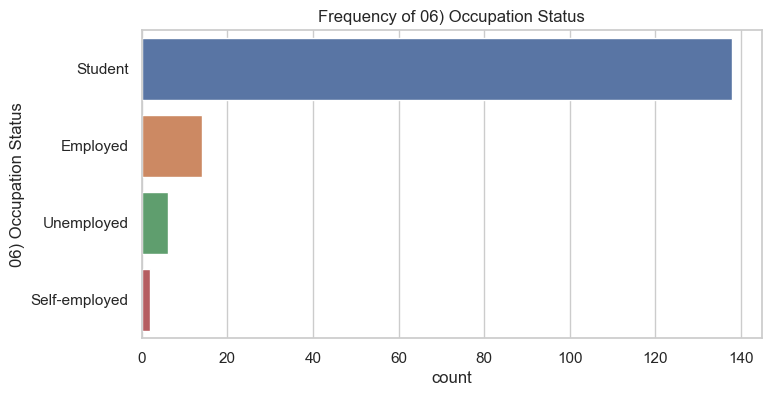

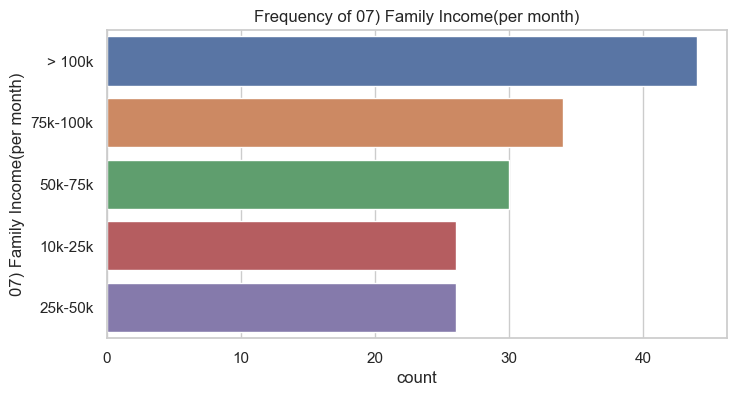

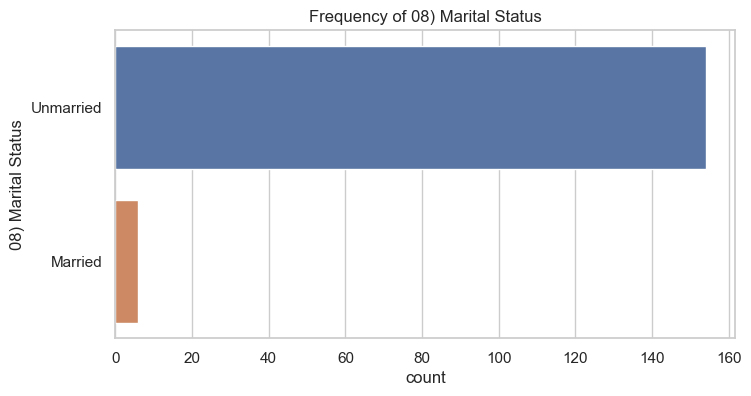

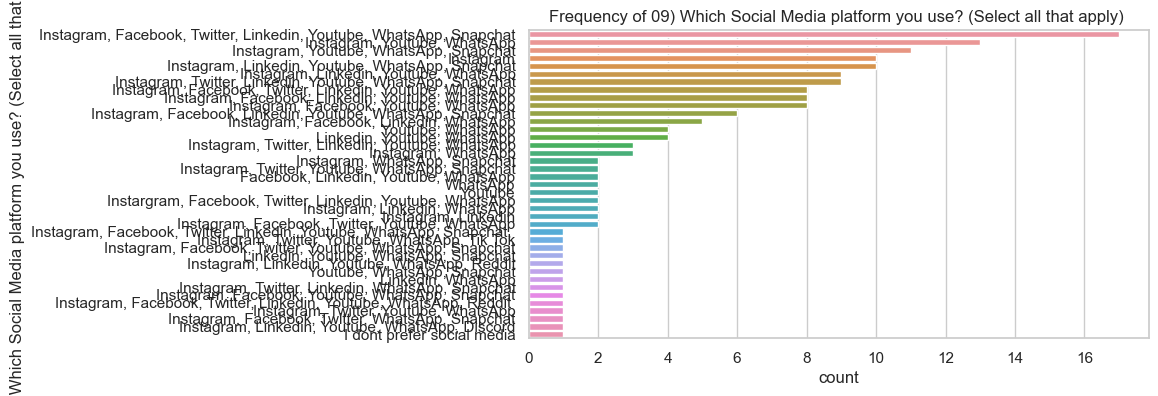

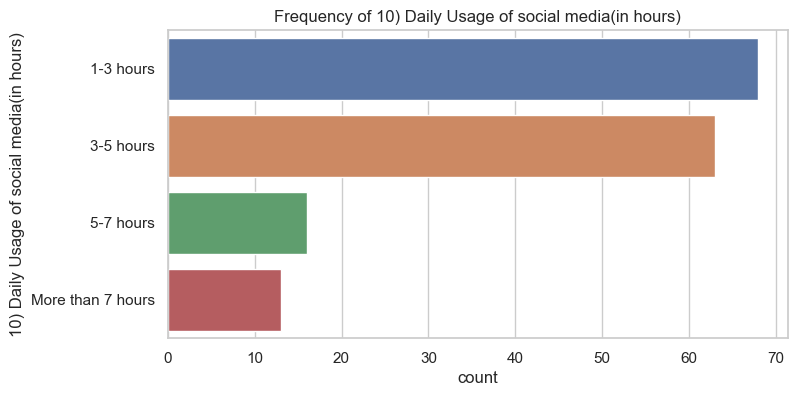

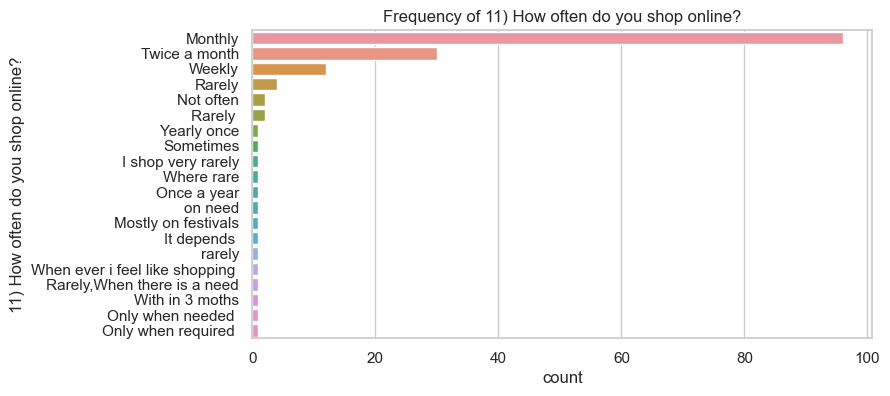

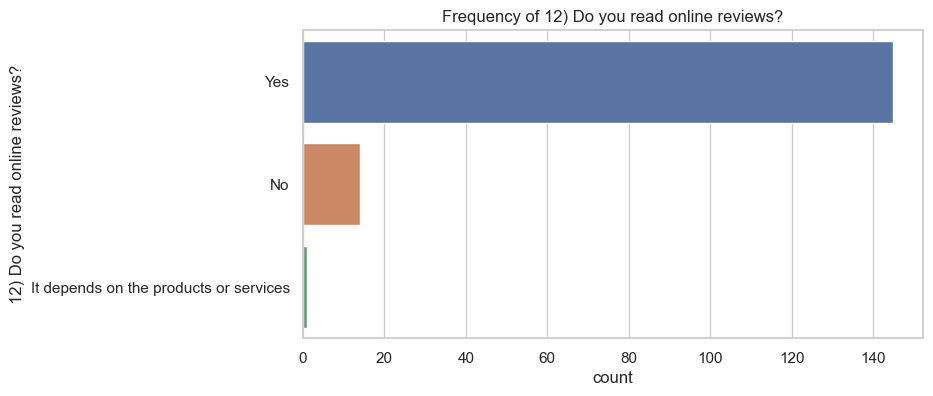

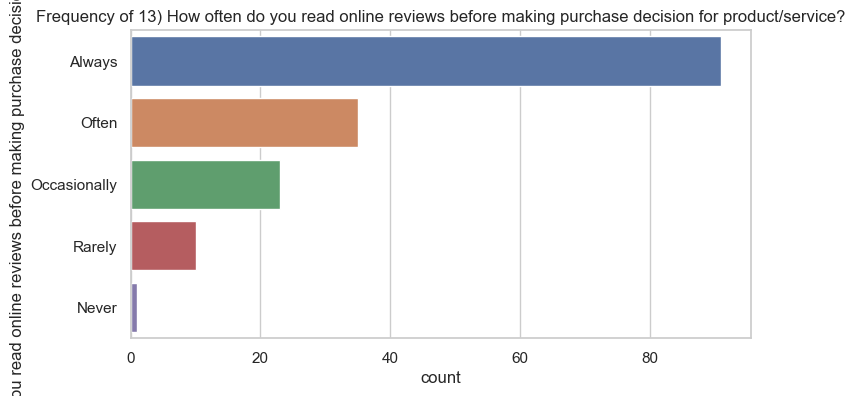

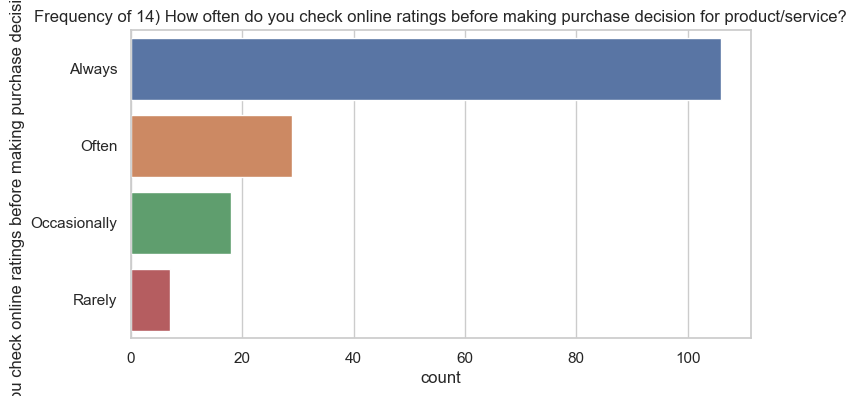

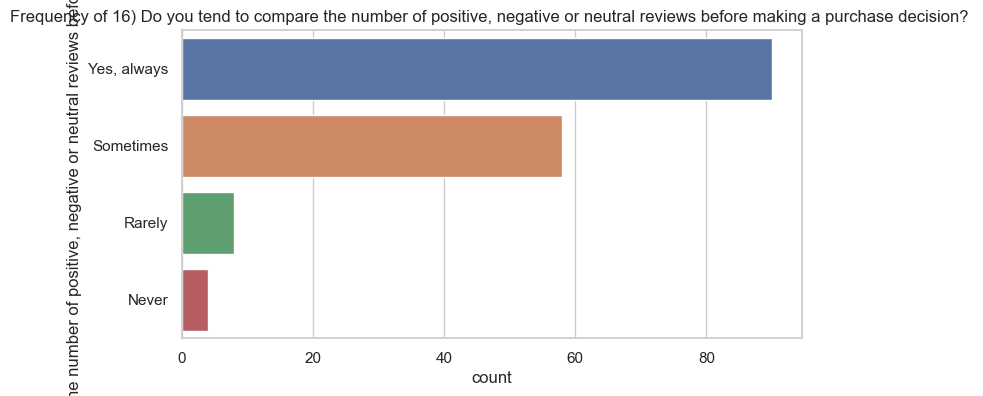

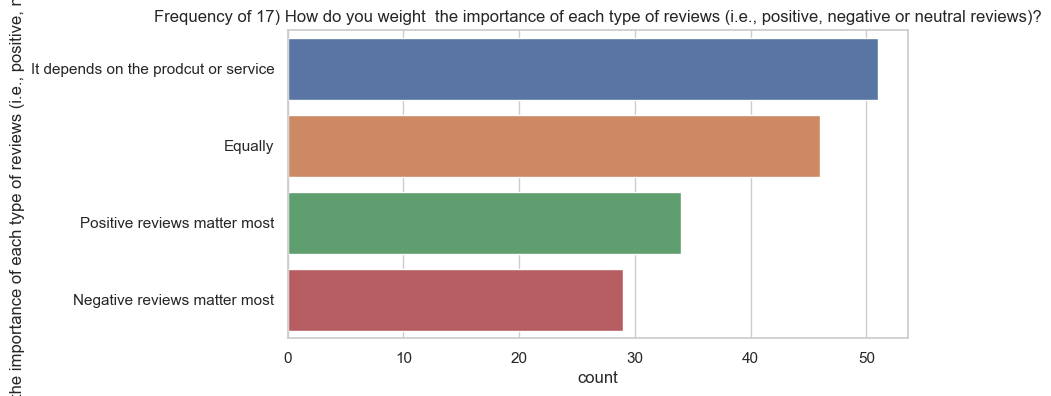

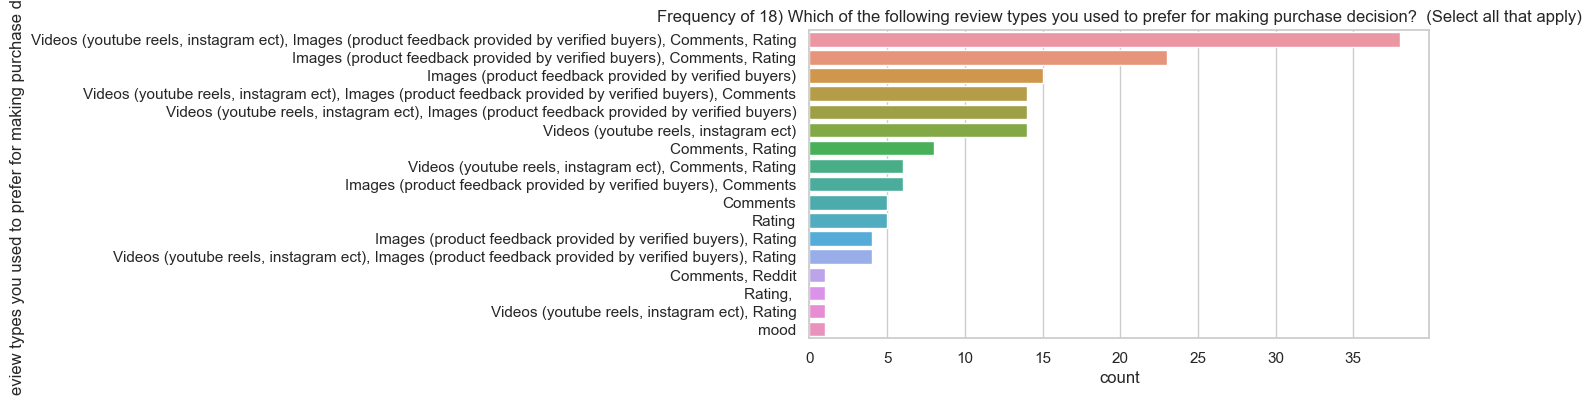

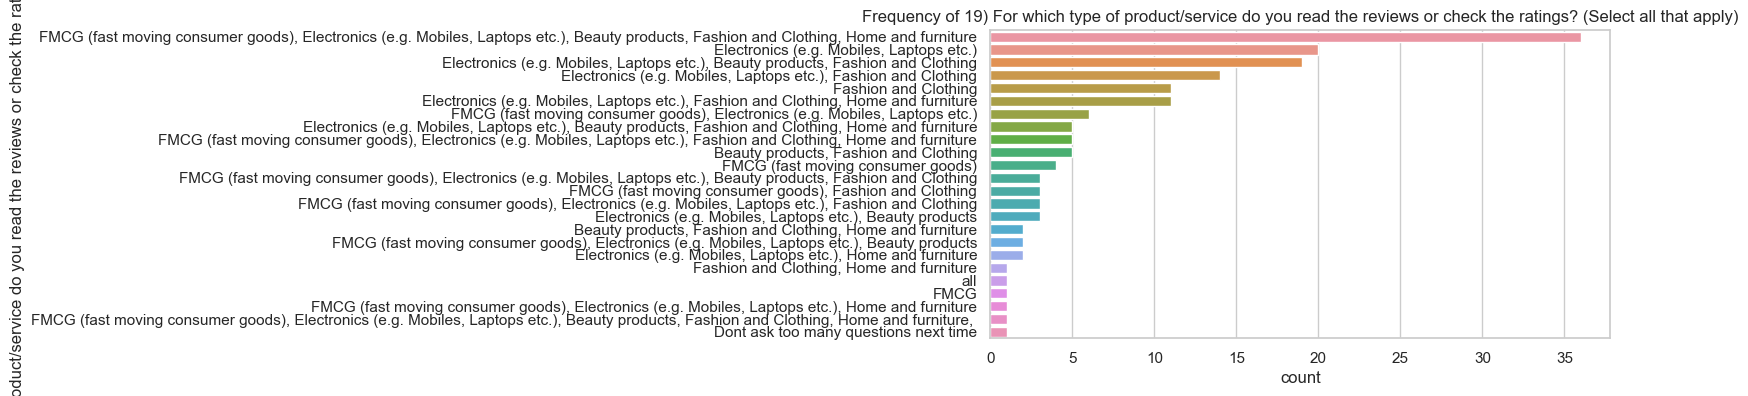

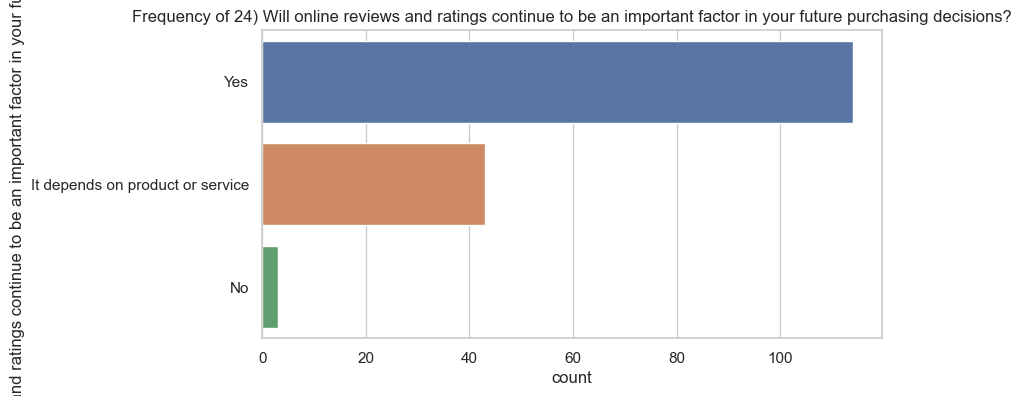

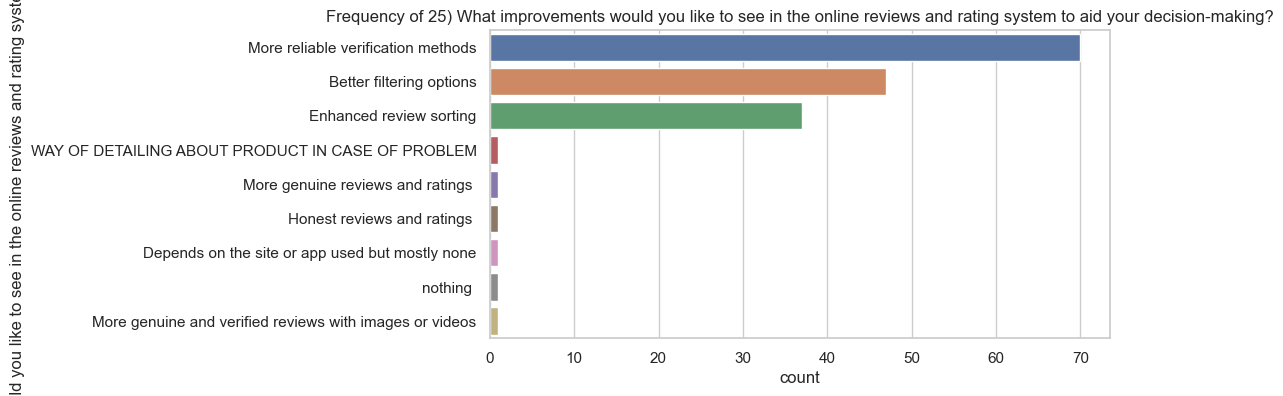

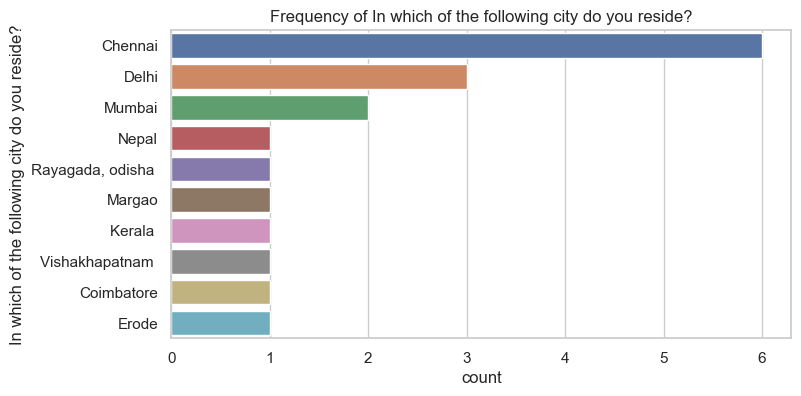

In [6]:
# Bar plot for categorical columns
categorical_cols = data.select_dtypes(include='object').columns
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(y=data[col], order=data[col].value_counts().index)
    plt.title(f'Frequency of {col}')
    plt.show()


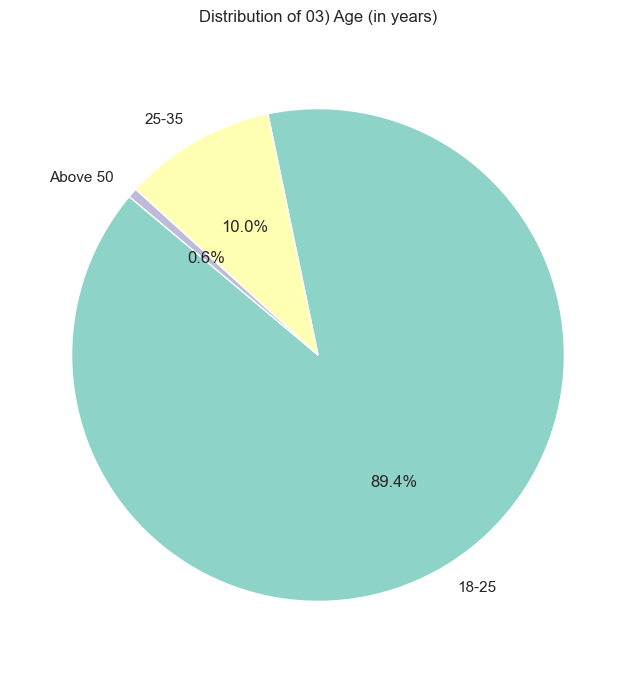

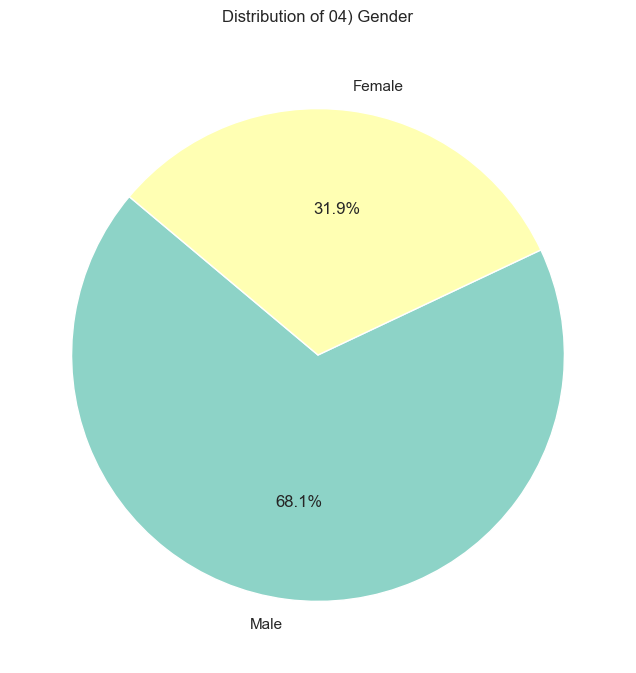

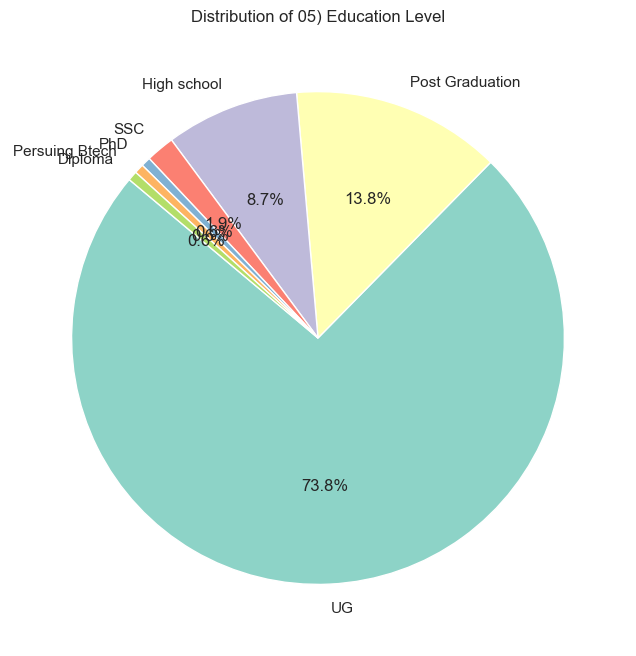

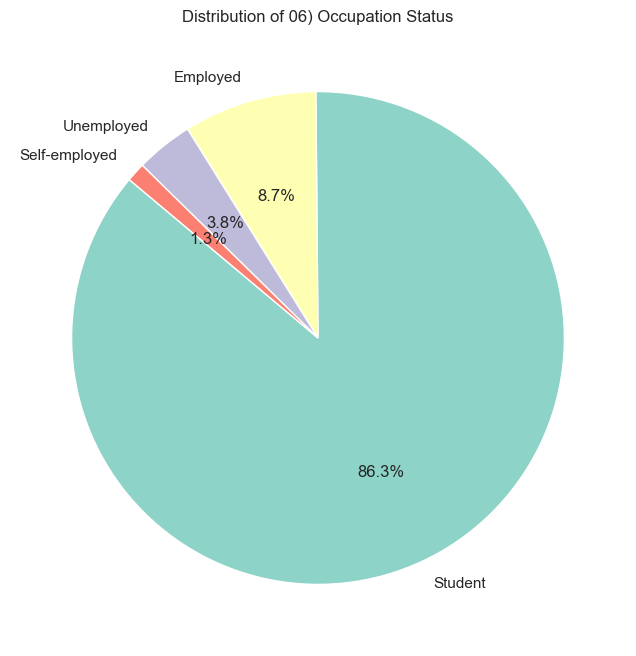

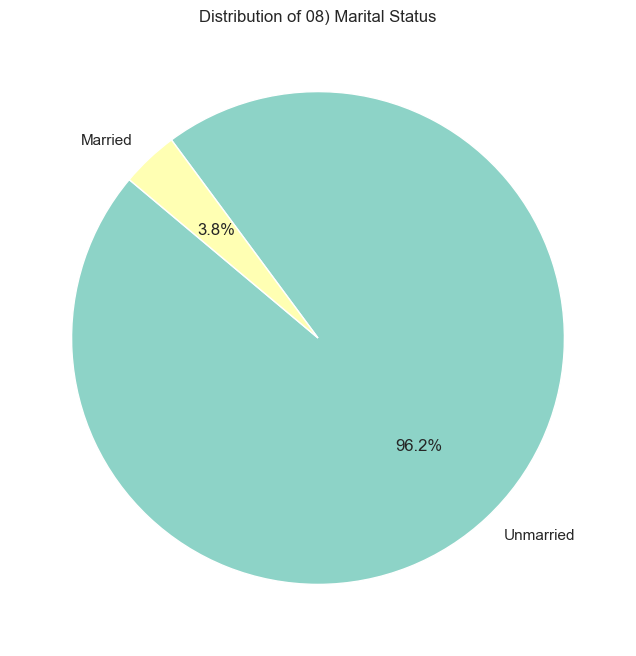

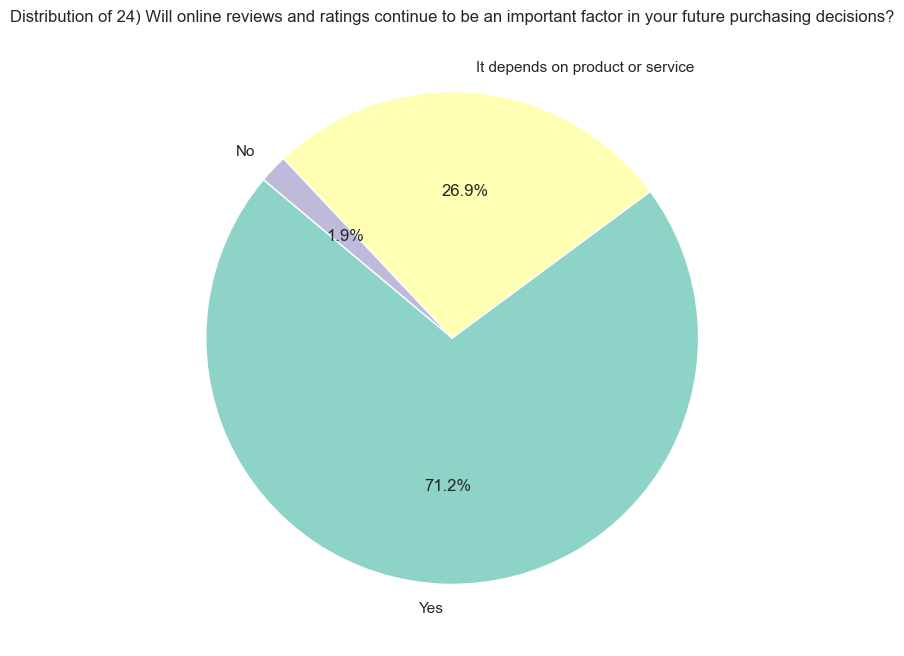

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of selected categorical columns for pie charts
categorical_cols = [
    '03) Age (in years)\n', 
    '04) Gender\n', 
    '05) Education Level', 
    '06) Occupation Status', 
    '08) Marital Status', 
    '24) Will online reviews and ratings continue to be an important factor in your future purchasing decisions?'
]

# Generate pie charts for each selected column
for col in categorical_cols:
    plt.figure(figsize=(8, 8))
    data[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set3"))
    plt.title(f'Distribution of {col}')
    plt.ylabel('')  # Hide the y-label for better aesthetics
    plt.show()


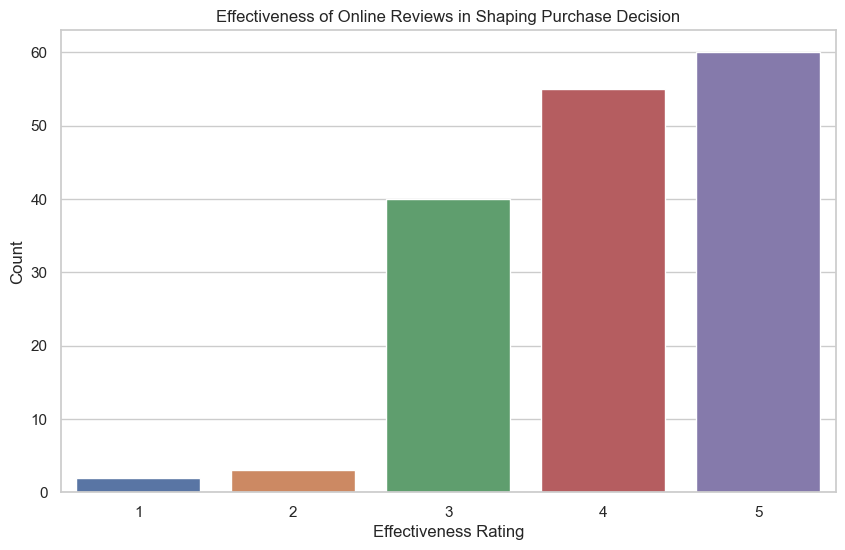

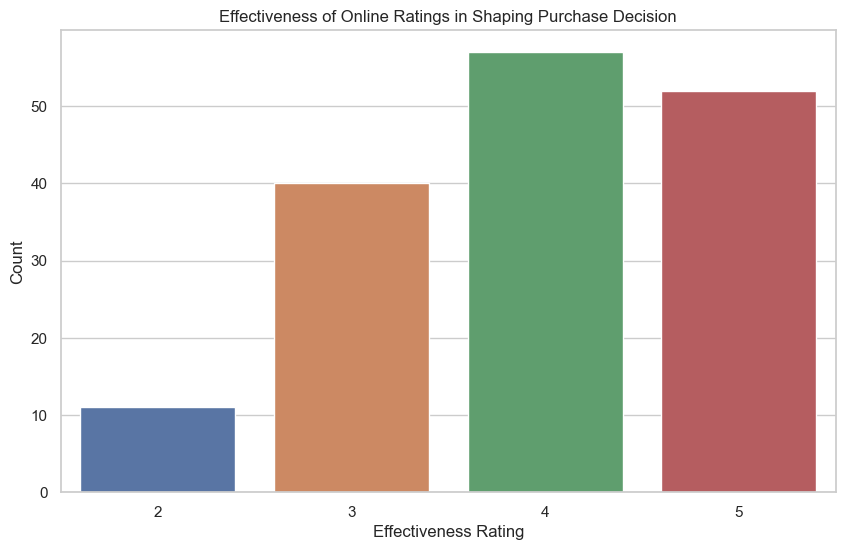

Percentage distribution of responses for online reviews effectiveness:
 5    37.500
4    34.375
3    25.000
2     1.875
1     1.250
Name: 22) Overall, how effective do you find online reviews in shaping your purchase decision?, dtype: float64
Percentage distribution of responses for online ratings effectiveness:
 4    35.625
5    32.500
3    25.000
2     6.875
Name: 23) Overall, how effective do you find online ratings in shaping your purchase decision?, dtype: float64


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up visualizations for the effectiveness of online reviews and ratings in shaping purchasing decisions

# Count plot for effectiveness of online reviews
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='22) Overall, how effective do you find online reviews in shaping your purchase decision?')
plt.title('Effectiveness of Online Reviews in Shaping Purchase Decision')
plt.xlabel('Effectiveness Rating')
plt.ylabel('Count')
plt.show()

# Count plot for effectiveness of online ratings
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='23) Overall, how effective do you find online ratings in shaping your purchase decision?')
plt.title('Effectiveness of Online Ratings in Shaping Purchase Decision')
plt.xlabel('Effectiveness Rating')
plt.ylabel('Count')
plt.show()

# Further analysis: Calculate percentage distribution of responses for each rating
# Online reviews
review_effectiveness_counts = data['22) Overall, how effective do you find online reviews in shaping your purchase decision?'].value_counts(normalize=True) * 100
print("Percentage distribution of responses for online reviews effectiveness:\n", review_effectiveness_counts)

# Online ratings
rating_effectiveness_counts = data['23) Overall, how effective do you find online ratings in shaping your purchase decision?'].value_counts(normalize=True) * 100
print("Percentage distribution of responses for online ratings effectiveness:\n", rating_effectiveness_counts)
